In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import font_manager, rc

# 한글 깨짐 방지 코드
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 월별

## 단일회귀분석

In [3]:
# 월별 통합 데이터 = df
df = pd.read_csv('../pre_data/월별_통합_모델링용.csv',index_col=0)
df

,date,닭고기가격,병아리(원/수),hot_day,import amount,feedprice,oil_avg,도축,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,2012-01-31,3202,250,0,8754,533.6,107.066111,58873,59981,18465,0.25,3.25
2,2012-02-29,3668,420,0,10098,529.9,112.537302,55879,56019,16634,0.75,3.25
3,2012-03-31,4169,500,0,10836,527.9,117.745606,58750,50899,16317,0.25,3.25
4,2012-04-30,3399,332,0,13412,526.3,113.723667,60940,53879,15882,0.25,3.25
5,2012-05-31,3255,200,0,14519,526.2,104.184710,73505,55403,16798,0.25,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-08-31,3505,312,3,9360,492.0,69.247955,89892,99247,26078,0.25,0.75
118,2021-09-30,3074,408,0,9009,503.0,72.975152,81026,103039,26346,0.25,0.75
119,2021-10-31,3913,447,0,12005,508.0,82.193333,81228,110791,25977,0.25,0.75
120,2021-11-30,2985,315,0,10025,520.0,79.858712,86819,107207,25217,0.25,1.00


In [4]:
# Linear Regression

from sklearn.linear_model import LinearRegression

X = df['병아리(원/수)']
y = df['닭고기가격']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1),y)

LinearRegression()

In [5]:
y_predicted = line_fitter.predict([[450]])
y_predicted

array([3360.11219087])

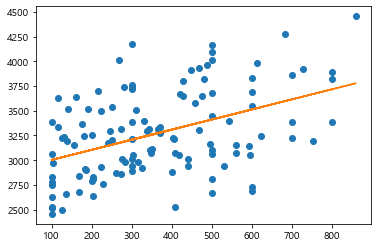

In [6]:
plt.plot(X,y,'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

Epoch 1/20
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00    
Epoch 2/20
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/20
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/20
120/120 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/20
120/120 [==============================] - 0s 976us/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/20
120/120 [==============================] - 0s 997us/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/20
120/120 [==============================] - 0s 892us/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/20
120/120 [==============================] - 0s 817us/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/20
120/120 [==============================] - 0s 830us/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/20
120/120 [==============================] - 0s 813us/step - loss: 

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


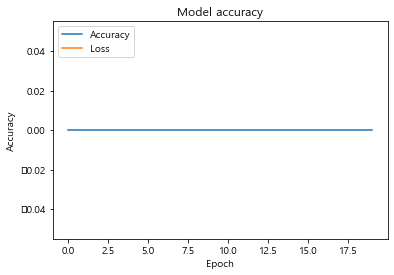

In [9]:
# 튜닝하는 것인데, 형식이 안맞아서인지 뭔지 때문에 학습이 안됨

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# data set
x_data = df[['병아리(원/수)']]
y_data = df[['닭고기가격']]

# model: linear regression input dense with dim =1
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

# model compile:  SGD learning_rate of 0.01 
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(loss='mse',optimizer=sgd, metrics=['accuracy'])

# model fit
history = model.fit(x_data.values.reshape(-1,1), y_data, epochs=20, batch_size=1, shuffle=False, verbose=1)

# prediction
print (model.predict([500]))

# print model summary
model.summary()

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
#print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
# plt.savefig('tran_result.png')
#plt.show()


## 다중회귀분석

In [21]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['닭고기가격','date'])
# x = df[['병아리(원/수)','oil_avg']]
y = df[['닭고기가격']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [23]:
# 실제값으로 예측하는 방법
# pred = [[450,110]]
# my_predict = mlr.predict(pred)
# my_predict

In [24]:
y_predict = mlr.predict(x_test)
y_predict

array([[3474.48332601],
       [2955.008619  ],
       [3406.37968986],
       [2620.43114541],
       [3181.03998671],
       [3553.98736416],
       [3794.91066645],
       [3530.87631207],
       [3455.72542755],
       [2901.0319085 ],
       [3023.19474121],
       [3351.70118391],
       [3412.52658599],
       [3144.11322593],
       [3323.74353308],
       [3855.55324233],
       [3130.3217662 ],
       [3653.56440534],
       [3199.05235167],
       [3033.54681309],
       [3208.56651186],
       [3448.57282795],
       [3425.65911558],
       [2873.14028388]])

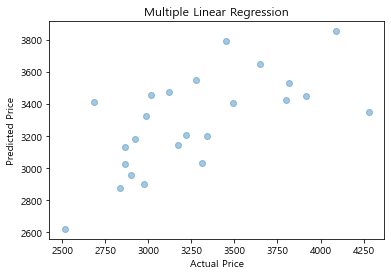

In [25]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

In [27]:
mlr.coef_

array([[ 1.28833480e+00,  2.84977422e+01,  7.28235905e-03,
         5.97686402e+00,  1.44534275e+00,  3.93459943e-04,
        -1.05713267e-02, -1.68500315e-02, -5.72252362e+01,
        -2.46366256e+02]])

In [28]:
mlr.score(x_train, y_train)
# 0.7이 넘어야 양호한 점수임(닭고기 가격의 63.3%를 저 항목들로 설명할 수 있다는 의미)
# https://hleecaster.com/ml-multiple-linear-regression-example/

0.6366043716142527

# 일별

## 다중회귀분석

In [17]:
# 일별 통합 데이터 = data
data = pd.read_csv('../pre_data/일별_통합_모델링용.csv',index_col=0)
data = data.drop(columns='한국기준금리')
data

,date,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리
0,2021-12-31,4047,400,76.703333,111396,25177,0.25
1,2021-12-30,4047,400,77.850000,111396,25411,0.25
2,2021-12-29,3895,400,77.566667,112019,26891,0.25
3,2021-12-28,3895,400,77.130000,110865,26936,0.25
4,2021-12-27,3743,400,76.530000,109225,26993,0.25
...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200,108.180000,58380,19570,0.75
2992,2012-01-05,3118,200,108.260000,58870,19830,0.75
2993,2012-01-04,3118,300,108.470000,61700,20300,0.75
2994,2012-01-03,3118,300,107.000000,61030,20330,0.75


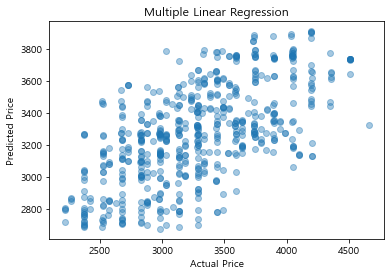

0.3644970719597417

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data[['병아리(원/수)','oil_avg','소_소비자가_int', '돼지_소비자가_int', '미국기준금리']]
y = data[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

# pred = [[400,78,20,10,25]]
# my_predict = mlr.predict(pred)
# print(my_predict)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

mlr.score(x_train, y_train)
# 36.4%로 월별 데이터보다 더 안좋은 결과가 나옴